<a href="https://colab.research.google.com/github/H-MATHEUS2006/Barbearia/blob/main/Data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
notas.shape

(100836, 4)

In [5]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


codigo a baixo para pegar as notas unicas que foram dadas

In [6]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [8]:
notas["nota"].mean()

3.501556983616962

desenhando o grafico de notas

<Axes: ylabel='Frequency'>

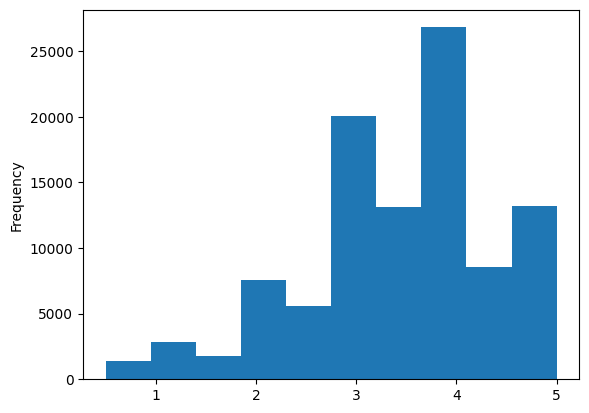

In [9]:
notas.nota.plot(kind='hist')

In [10]:
notas["nota"].median()

3.5

In [11]:
mediana = notas["nota"].median()
media = notas["nota"].mean()

print(f"Mediana é {mediana}")
print(f"Média é {media}")

Mediana é 3.5
Média é 3.501556983616962


In [12]:
notas["nota"].describe()


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Aqui estamos usando a biblioteca para graficos seaborn

<Axes: ylabel='nota'>

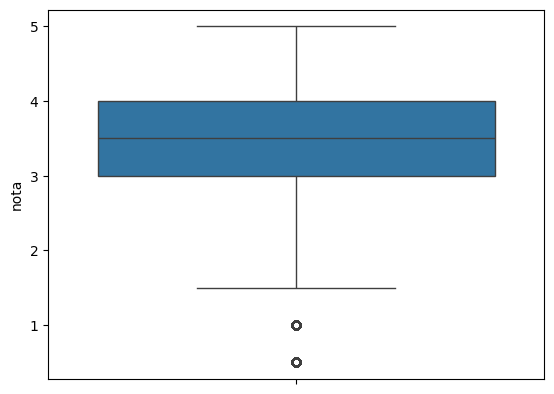

In [13]:
import seaborn as sns

sns.boxplot(notas["nota"])

In [16]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos" ]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
notas.query("filmeId==1")["nota"].mean()

3.9209302325581397

In [20]:
notas.query("filmeId==2")["nota"].mean()

3.4318181818181817

In [24]:
medias_por_filme = notas.groupby("filmeId")["nota"].mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

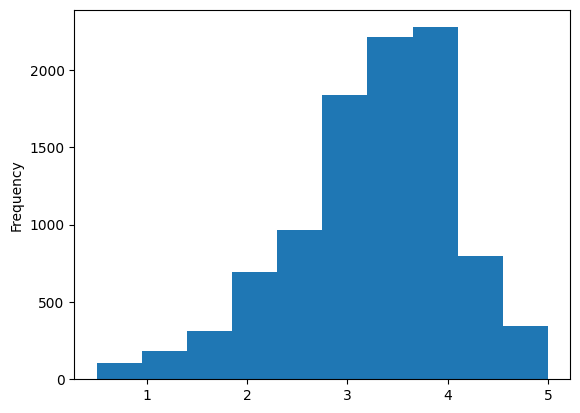

In [25]:
medias_por_filme.plot(kind='hist')

<Axes: ylabel='nota'>

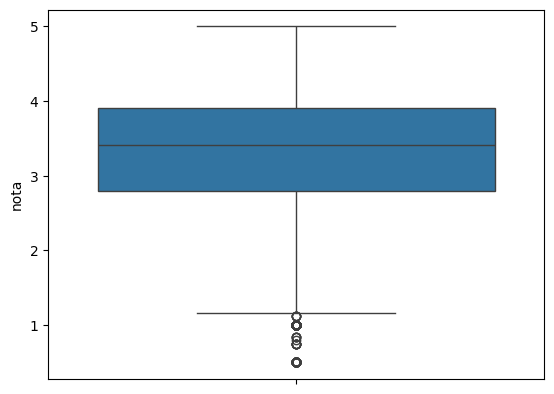

In [26]:
sns.boxplot(medias_por_filme)

In [27]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<ipython-input-33-e868557e21dd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, kde=True)


Text(0.5, 1.0, 'Histograma das médias dos filmes')

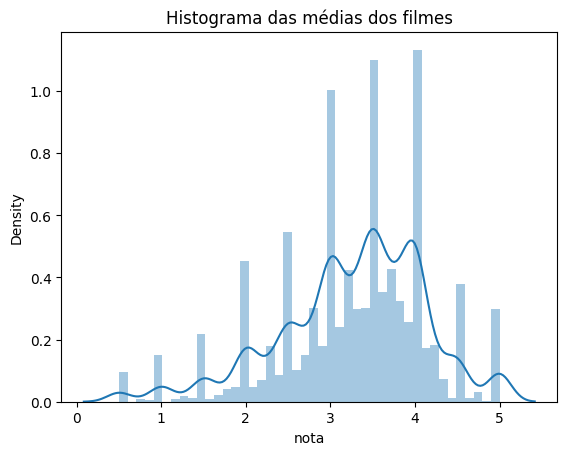

In [33]:
import matplotlib.pyplot as plt

sns.distplot(medias_por_filme, kde=True)
plt.title("Histograma das médias dos filmes")
